# Storage API Example

This notebook shows how how to use the `storage` library for storing/loading images from disk.

In [4]:
import sys
if '../' not in sys.path:
    sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
    
import storage

%matplotlib inline

In [18]:
# Open an on-disk image dataset (may not exist yet).
dataset = storage.DiskDataset("/tmp/dataset")

# Add a new image to the dataset. Images are indexed by location and image
# source (e.g. "landsat8"). Both are arbitrary strings.
for i in range(5):
    location_id = "mine_site_{}".format(i)
    source_id = "landsat8_32day"
    image = np.random.rand(100, 100, 3, 2)
    metadata = {"bands": ["B1", "B2", "B3"], "dates": ["20150101", "20150202"]}
    if not dataset.has_image(location_id, source_id):
        dataset.add_image(location_id, source_id, image, metadata)
    else:
        print "image {}/{} already exists!".format(location_id, source_id)

image mine_site_0/landsat8_32day already exists!
image mine_site_1/landsat8_32day already exists!
image mine_site_2/landsat8_32day already exists!
image mine_site_3/landsat8_32day already exists!
image mine_site_4/landsat8_32day already exists!


In [19]:
# pd.DataFrame listing all (location_id, image_source_id, metadata).
dataset.metadata()

,location_id,metadata,source_id
0,mine_site_0,"{u'bands': [u'B1', u'B2', u'B3'], u'dates': [u...",landsat8_32day
1,mine_site_1,"{u'bands': [u'B1', u'B2', u'B3'], u'dates': [u...",landsat8_32day
2,mine_site_2,"{u'bands': [u'B1', u'B2', u'B3'], u'dates': [u...",landsat8_32day
3,mine_site_3,"{u'bands': [u'B1', u'B2', u'B3'], u'dates': [u...",landsat8_32day
4,mine_site_4,"{u'bands': [u'B1', u'B2', u'B3'], u'dates': [u...",landsat8_32day


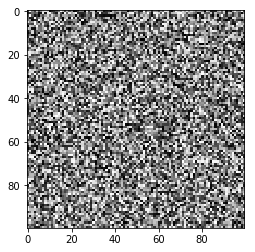

In [20]:
# Loads 'image' from disk.
image = dataset.load_image("mine_site_2", "landsat8_32day")
plt.imshow(image[:, :, 0, 0], cmap="gray")

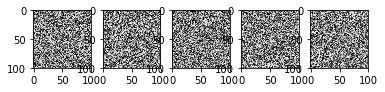

In [17]:
# Load all images with the same source.
_, axs = plt.subplots(1, 5)
axs = axs.flatten()
for i, (image, image_metadata) in enumerate(dataset.load_images("landsat8_32day")):
    image                          # np.array
    image_metadata["location_id"]  # "mine_site_0"
    image_metadata["source_id"]    # "landsat8_32day"
    image_metadata["metadata"]     # {"bands": ..., "dates": ...}
    axs[i].imshow(image[:, :, 0, 0], cmap='gray')